# EDA

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import wave
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler


### Plot distribution

In [ ]:
# Number of audios in total and number of audios in each class
def count_audios():
    total = 0
    classes = {}
    for root, dirs, files in os.walk("../data"):
        for file in files:
            if file.endswith(".wav"):
                total += 1
                class_name = root.split("/")[-1]
                if class_name not in classes:
                    classes[class_name] = 1
                else:
                    classes[class_name] += 1
    return total, classes


audios, classes = count_audios()
print("Total number of audios:", audios)
print("Number of audios in each class:")
for key, value in classes.items():
    print(key, value)


Total number of audios: 13000
Number of audios in each class:
data\audios\negative 5000
data\audios\positive 5000
data\audios\security 3000


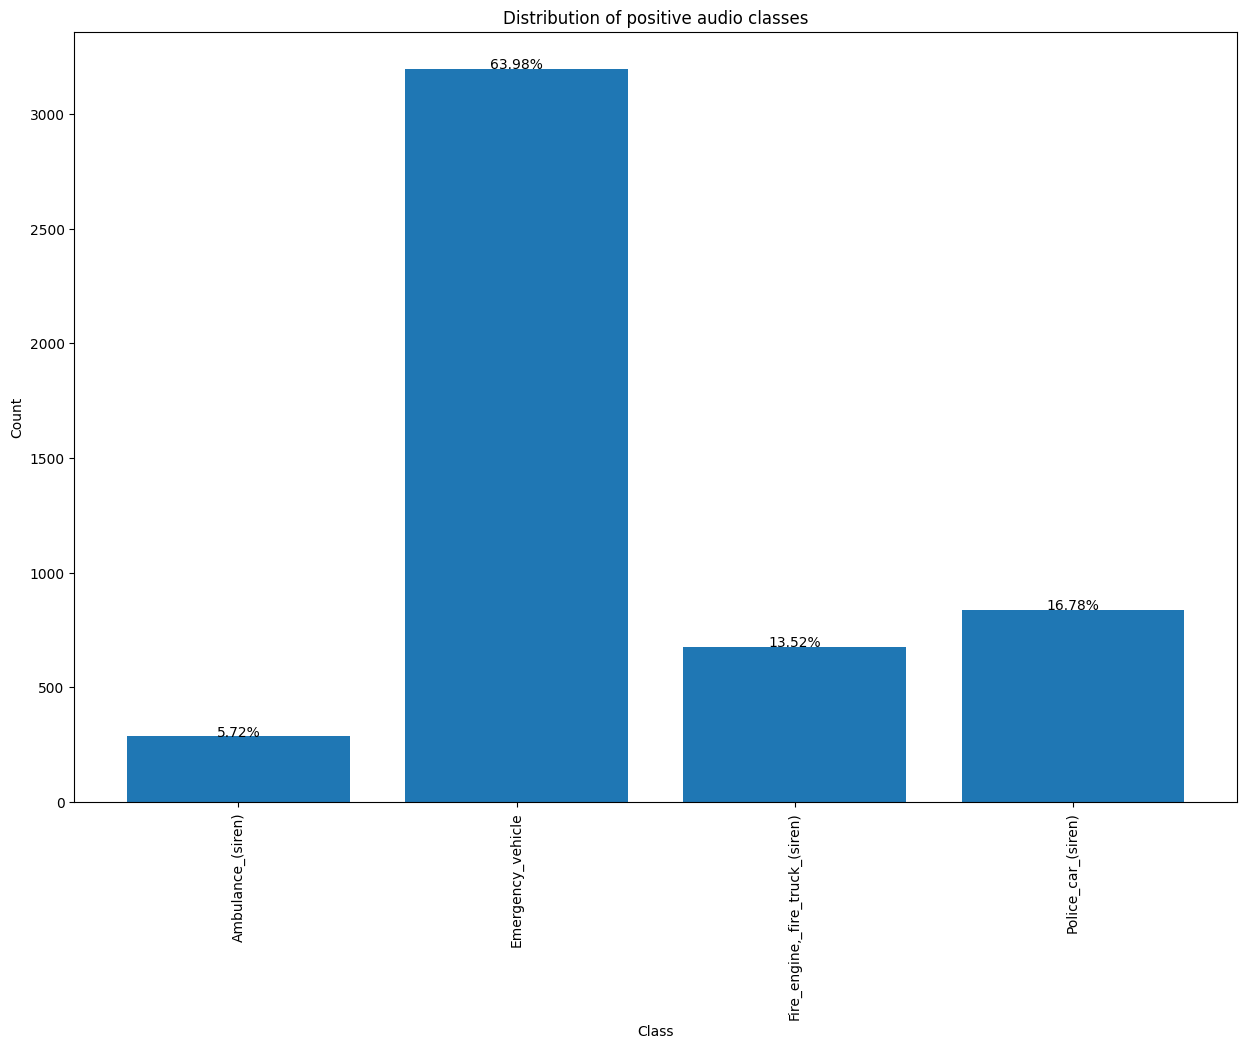

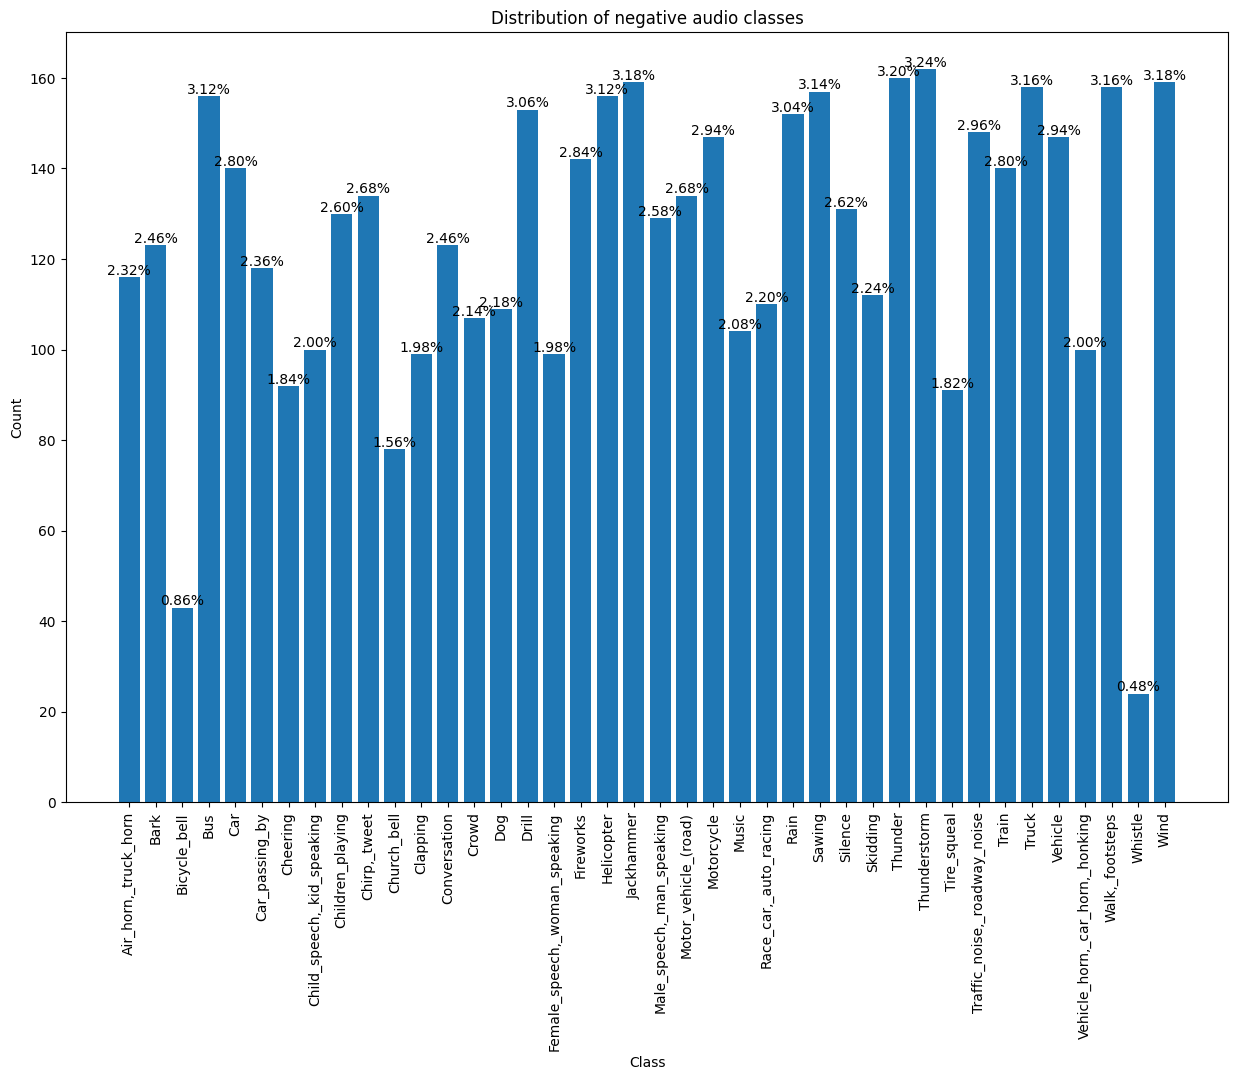

{'Air_horn,_truck_horn': 0.0232, 'Bark': 0.0246, 'Bicycle_bell': 0.0086, 'Bus': 0.031199999999999995, 'Car': 0.028000000000000004, 'Car_passing_by': 0.0236, 'Cheering': 0.0184, 'Child_speech,_kid_speaking': 0.02, 'Children_playing': 0.026000000000000002, 'Chirp,_tweet': 0.0268, 'Church_bell': 0.015599999999999998, 'Clapping': 0.0198, 'Conversation': 0.0246, 'Crowd': 0.021399999999999995, 'Dog': 0.0218, 'Drill': 0.030600000000000002, 'Female_speech,_woman_speaking': 0.0198, 'Fireworks': 0.0284, 'Helicopter': 0.031199999999999995, 'Jackhammer': 0.0318, 'Male_speech,_man_speaking': 0.0258, 'Motor_vehicle_(road)': 0.0268, 'Motorcycle': 0.0294, 'Music': 0.0208, 'Race_car,_auto_racing': 0.022, 'Rain': 0.0304, 'Sawing': 0.0314, 'Silence': 0.0262, 'Skidding': 0.022399999999999996, 'Thunder': 0.032, 'Thunderstorm': 0.0324, 'Tire_squeal': 0.0182, 'Traffic_noise,_roadway_noise': 0.0296, 'Train': 0.028000000000000004, 'Truck': 0.0316, 'Vehicle': 0.0294, 'Vehicle_horn,_car_horn,_honking': 0.02, 'Wa

In [ ]:
# Plot distribution of audio classes
# the name of each audio is {class}-{class_name}-{code}.wav
def plot_distribution(audio_dir):
    percents = []
    audio_files = os.listdir(audio_dir)
    audio_classes = [audio_file.split("-")[1] for audio_file in audio_files]
    audio_classes = np.array(audio_classes)
    unique_classes, counts = np.unique(audio_classes, return_counts=True)
    plt.figure(figsize=(15, 10))
    plt.bar(unique_classes, counts)
    plt.xticks(unique_classes)
    plt.xlabel("Class")
    for i, v in enumerate(counts):
        plt.text(i, v + 0.5, f"{(v / sum(counts)) * 100:.2f}%", ha="center")
        percents.append(float((v / sum(counts)) * 100))
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    title = audio_dir.split("/")[-1]
    plt.title(f"Distribution of {title} audio classes")
    plt.show()

    return unique_classes, counts, percents


# Show distribution for all audio files
u, c, p = plot_distribution("../data/audios/positive")
u, c, p = plot_distribution("../data/audios/negative")

a = {}
for i, e in enumerate(u):
    a[str(e)] = p[i] / 100

print(a)

# Print distribution of negative audios
print("Distribution of negative audios:")
print("Class Name\tCount")
for i, e in enumerate(u):
    print(e, c[i])


In [ ]:
# Plot some others graphs to explain the data
# volume distribution
def plot_volume_distribution(audio_dir):
    audio_files = os.listdir(audio_dir)
    volumes = []
    for audio_file in audio_files:
        audio_path = os.path.join(audio_dir, audio_file)
        with wave.open(audio_path, "rb") as wf:
            frames = wf.readframes(-1)
            sound_info = np.frombuffer(frames, "int16")
            volume = np.linalg.norm(sound_info)
            volumes.append(volume)
    plt.figure(figsize=(10, 6))
    plt.hist(volumes, bins=50)
    plt.xlabel("Volume")
    plt.ylabel("Count")
    plt.title("Volume distribution of audio files")
    plt.show()


# Show volume distribution for all audio files
plot_volume_distribution("../data/audios/positive")
plot_volume_distribution("../data/audios/negative")


KeyboardInterrupt: 

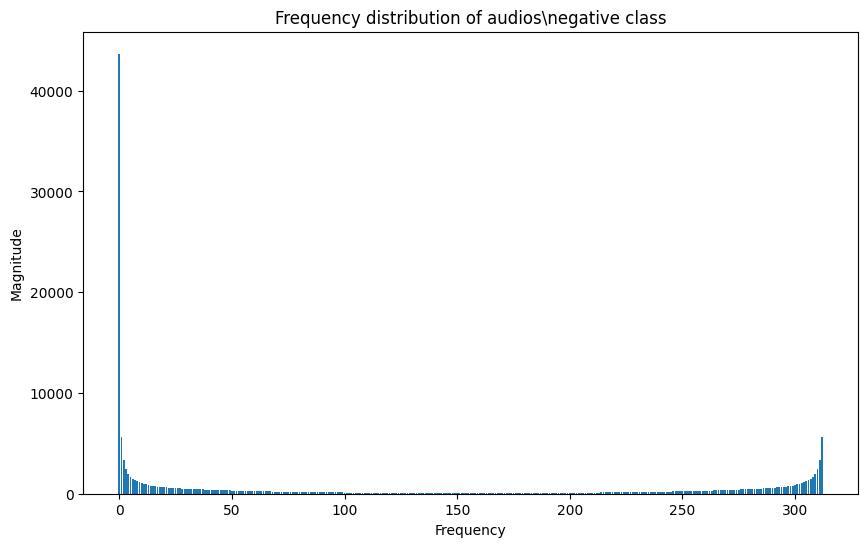

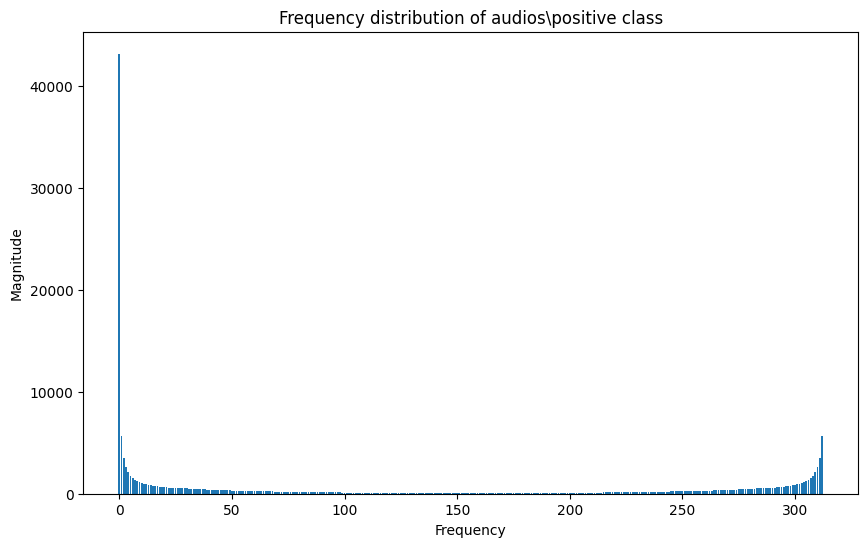

In [ ]:
# Bar plot of frequencies of sound of each class using fourier transform
def plot_class_frequencies():
    with open("../data/mfcc.pkl", "rb") as f:
        mfccs = pickle.load(f)
    for class_name, mfccs_list in mfccs.items():
        frequencies = []
        for mfcc in mfccs_list:
            frequencies.append(np.abs(np.fft.fft(mfcc)))
        frequencies = np.array(frequencies)
        mean_freq = np.mean(frequencies, axis=0)
        plt.figure(figsize=(10, 6))
        plt.bar(np.arange(mean_freq.shape[1]), mean_freq[0])
        plt.xlabel("Frequency")
        plt.ylabel("Magnitude")
        plt.title(f"Frequency distribution of {class_name} class")


plot_class_frequencies()


In [16]:
# load_model
def plot_feature(color_map="viridis", index=1, feature="chroma"):
    with open(f"../data/{feature}.pkl", "rb") as f:
        data = pickle.load(f)

    positive_data = np.array(data["positive"])
    pnames = data["pnames"]

    negative_data = np.array(data["negative"])
    nnames = data["nnames"]

    # Obtener índices aleatorios para datos positivos
    positive_indices = [
        index
    ]  # random.sample(range(len(positive_data)), min(num_to_plot, len(positive_data)))

    # Obtener índices aleatorios para datos negativos
    negative_indices = [
        index
    ]  # random.sample(range(len(negative_data)), min(num_to_plot, len(negative_data)))

    # Funciones auxiliares
    def normalize(X):
        return (X - np.mean(X)) / np.std(X)

    def sub_extra_column(X):
        return X[:, :, :-1]

    def transpose(X):
        return X.transpose(0, 2, 1)

    # Definición del pipeline
    preprocessing_pipeline = Pipeline(
        [
            (
                "normalize",
                FunctionTransformer(normalize, validate=False),
            ),  # Normalización
            ("scale", MinMaxScaler(feature_range=(0, 1))),  # Escalado
            (
                "sub_column",
                FunctionTransformer(sub_extra_column, validate=False),
            ),  # Quitar columna
            ("transpose", FunctionTransformer(transpose, validate=False)),  # Transponer
        ]
    )

    # Aplicar el pipeline
    def process_and_encode(X):
        # Reshape para MinMaxScaler (flatten y restaurar)
        X = preprocessing_pipeline.named_steps["normalize"].transform(X)
        X = (
            preprocessing_pipeline.named_steps["scale"]
            .fit_transform(X.reshape(X.shape[0], -1))
            .reshape(X.shape)
        )
        X = preprocessing_pipeline.named_steps["sub_column"].transform(X)
        X = preprocessing_pipeline.named_steps["transpose"].transform(X)

        # Predicción con el encoder
        return X

    positive_data = process_and_encode(positive_data)
    negative_data = process_and_encode(negative_data)

    # Graficar datos positivos aleatorios
    for i in positive_indices:
        mfccs = positive_data[i]
        print(f"Positive sample {i} ({pnames[i]})")
        if isinstance(mfccs, np.ndarray):
            plt.figure(figsize=(10, 4))
            plt.imshow(
                mfccs.T, cmap=color_map, origin="lower", aspect="auto", vmin=0, vmax=1
            )
            plt.xlabel("Frame")
            plt.ylabel("Dimension")
            plt.title(f"{feature.upper()} (Positive)")
            plt.colorbar(label="Power (dB)")
            plt.tight_layout()
            plt.show()
        else:
            print(f"Positive sample {i + 1} is not a numpy array, skipping plotting")

    # Graficar datos negativos aleatorios
    for i in negative_indices:
        mfccs = negative_data[i]
        print(f"Negative sample {i} ({nnames[i]})")
        if isinstance(mfccs, np.ndarray):
            plt.figure(figsize=(10, 4))
            plt.imshow(
                mfccs.T, cmap=color_map, origin="lower", aspect="auto", vmin=0, vmax=1
            )
            plt.xlabel("Frame")
            plt.ylabel("Dimension")
            plt.title(f"{feature.upper()} (Negative)")
            plt.colorbar(label="Power (dB)")
            plt.tight_layout()
            plt.show()
        else:
            print(f"Negative sample {i + 1} is not a numpy array, skipping plotting")


Positive sample 9 (1-Ambulance_(siren)-0EPK7Pv_lbE.wav)


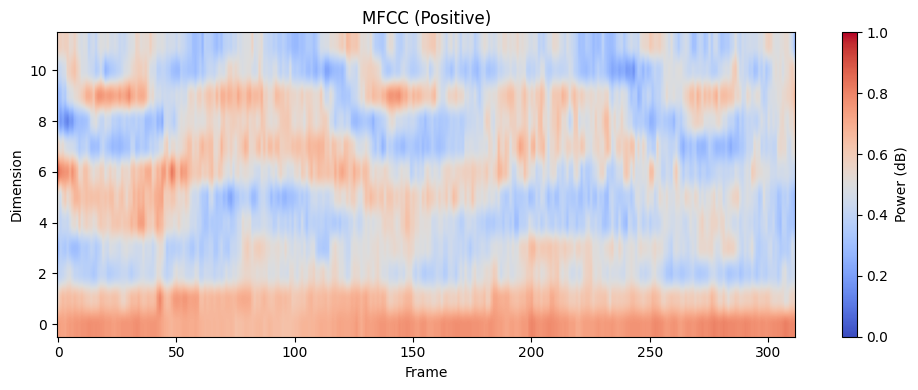

Negative sample 9 (0-Air_horn,_truck_horn-0UPY7ws-VFs.wav)


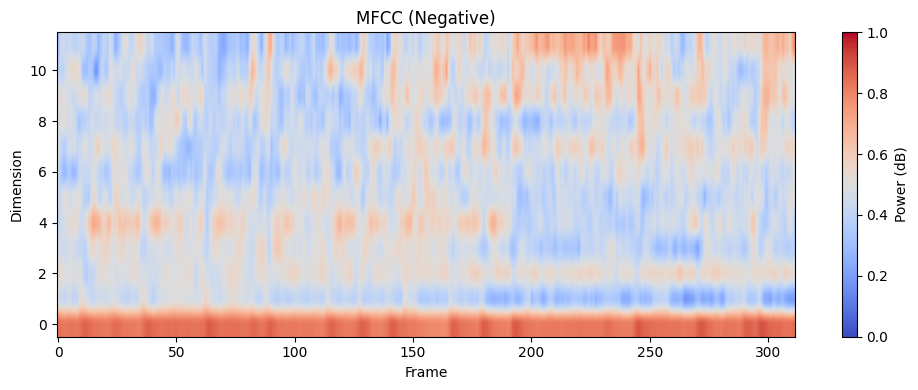

Positive sample 9 (1-Ambulance_(siren)-0EPK7Pv_lbE.wav)


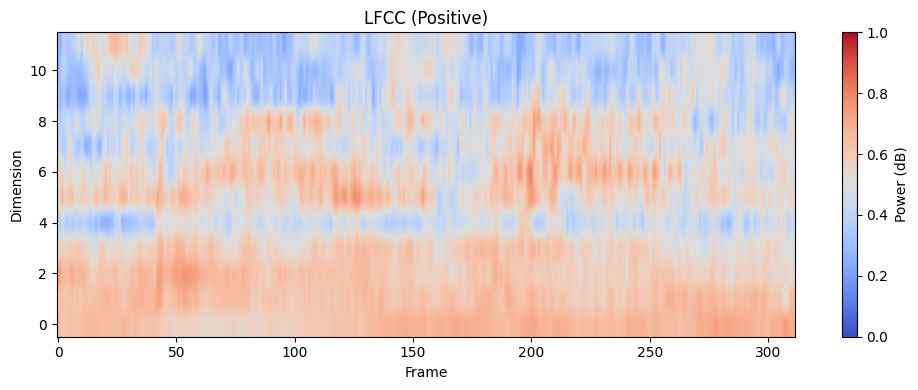

Negative sample 9 (0-Air_horn,_truck_horn-0UPY7ws-VFs.wav)


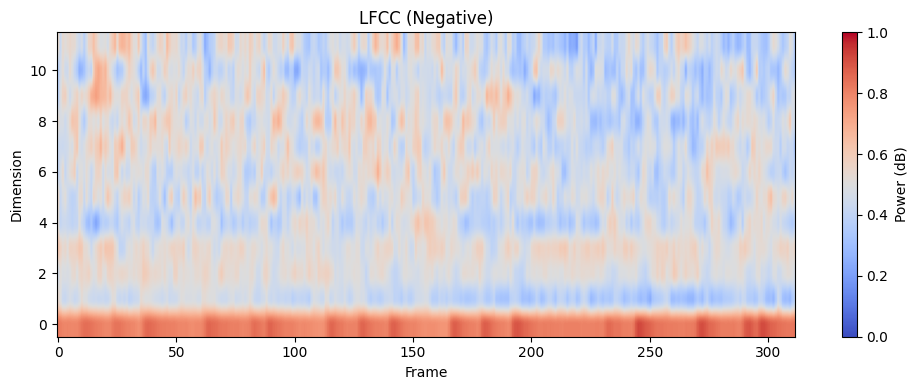

Positive sample 9 (1-Ambulance_(siren)-0EPK7Pv_lbE.wav)


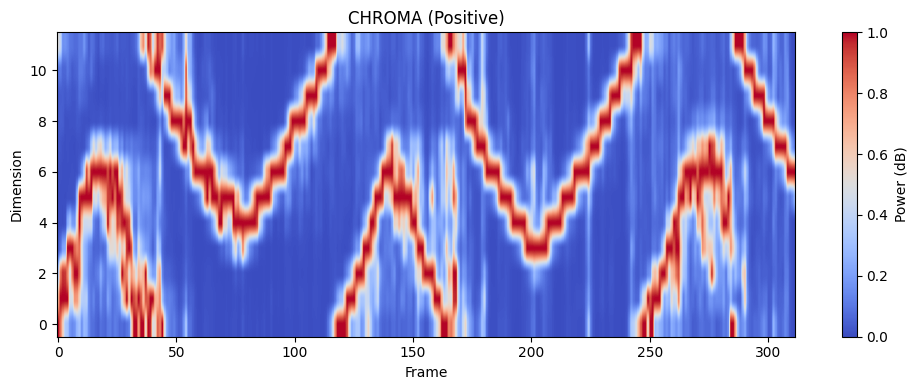

Negative sample 9 (0-Air_horn,_truck_horn-0UPY7ws-VFs.wav)


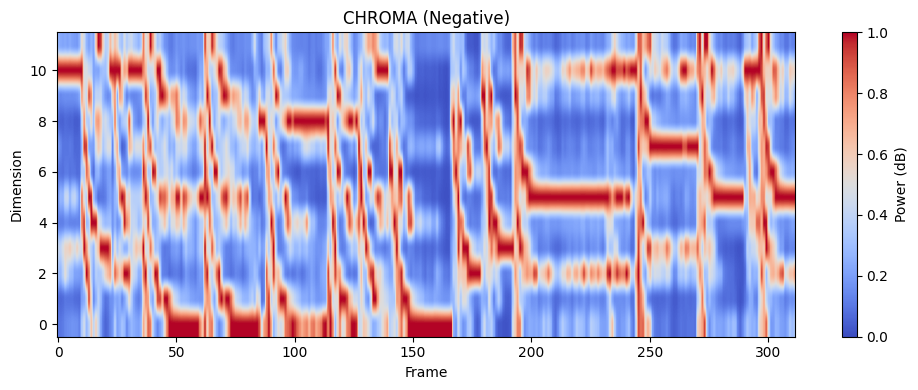

In [17]:
plot_feature("coolwarm", 9, "mfcc")
plot_feature("coolwarm", 9, "lfcc")
plot_feature("coolwarm", 9, "chroma")